In [1]:
from naat.data import US_LITIGATION_CASES_PATH
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us_cases_df = pd.read_csv(US_LITIGATION_CASES_PATH)

In [28]:
us_cases_df

,Case Name,Filing Year,Description,Case Categories,Principal Laws
0,"TransCanada Keystone Pipeline, LP v. Kerry",2016,Challenge to Obama administration denial of pr...,Constitutional Claims>Other Constitutional Claims,Article I (U.S. Constitution)|Article II (U.S....
1,Americans for Clean Energy v. EPA,2016,Challenge to EPA's final renewable fuel standa...,Federal Statutory Claims>Clean Air Act>Industr...,Clean Air Act (CAA)|Energy Independence and Se...
2,WildEarth Guardians v. Jewell,2015,Challenge to federal approval of mining plan f...,Federal Statutory Claims>NEPA,National Environmental Policy Act (NEPA)
3,Center for Biological Diversity v. Federal Hig...,2016,Challenge to approval of a highway project in ...,Federal Statutory Claims>NEPA|Federal Statutor...,National Environmental Policy Act (NEPA)|Depar...
4,Idaho Conservation League v. U.S. Forest Service,2016,Challenge to approval of mine exploration proj...,Federal Statutory Claims>NEPA|Federal Statutor...,National Environmental Policy Act (NEPA)|Natio...
...,...,...,...,...,...
1541,Texas Public Policy Foundation v. U.S. Departm...,2022,Freedom of Information Act lawsuit to compel d...,Federal Statutory Claims>Freedom of Informatio...,Freedom of Information Act (FOIA)
1542,Texas Public Policy Foundation v. U.S. Departm...,2022,Freedom of Information Act lawsuit to compel d...,Federal Statutory Claims>Freedom of Informatio...,Freedom of Information Act (FOIA)
1543,Fagen v. Enviva Inc.,2022,Securities class action lawsuit alleging that ...,Securities and Financial Regulation,Securities Act of 1933/Securities Exchange Act...
1544,"Clean Air Coalition of Western New York, Inc. ...",2023,Lawsuit challenging the New York State Public ...,State Law Claims>Environmentalist Lawsuits|Sta...,State Law—Miscellaneous Statutes>New York Clim...


In [11]:
print(us_cases_df.iloc[1544,].to_markdown())

|                 | 1544                                                                                                                                                                                                                                        |
|:----------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Case Name       | Clean Air Coalition of Western New York, Inc. v. New York State Public Service Commission                                                                                                                                                   |
| Filing Year     | 2023                                                                                                                                                                                                          

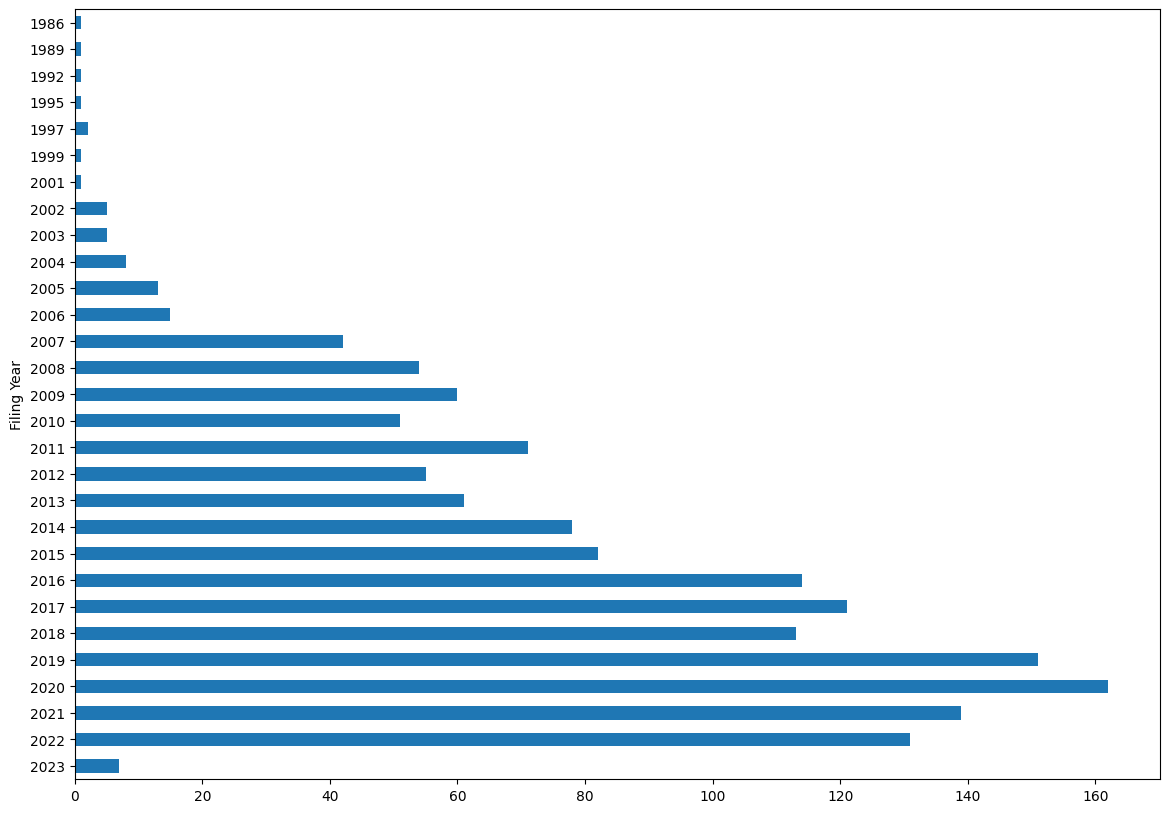

In [15]:
ax = us_cases_df.groupby(by="Filing Year")["Case Name"].count().sort_index(ascending=False).plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Case Categories'>

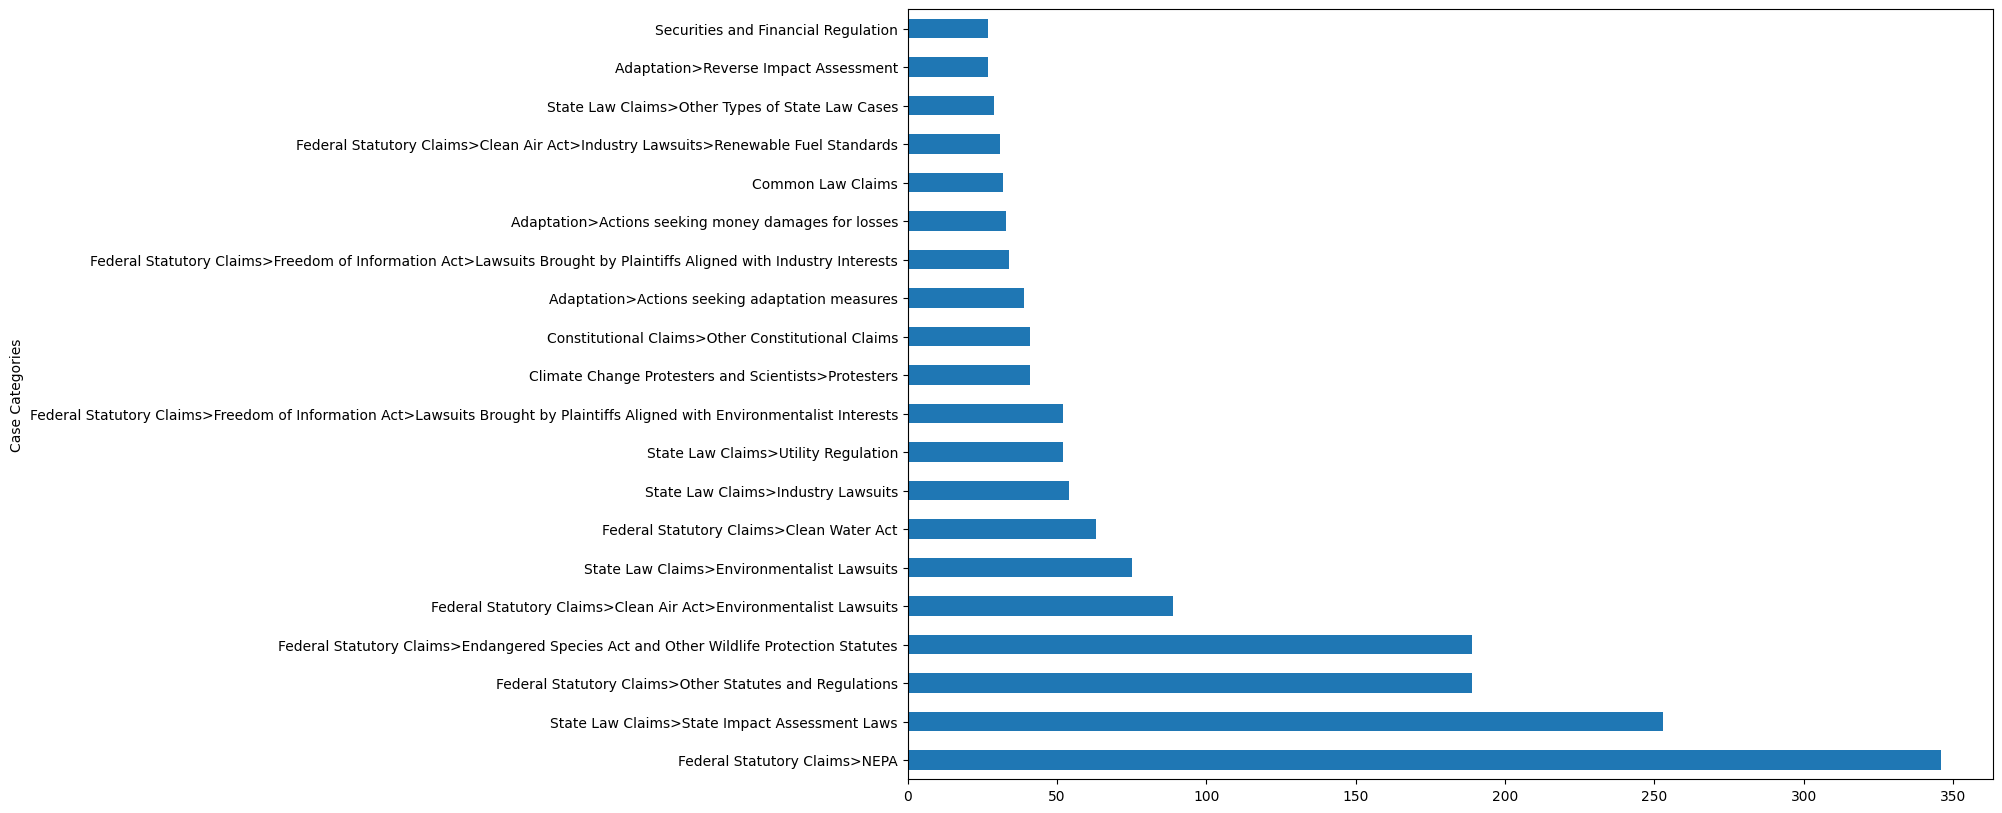

In [22]:
notna_field = us_cases_df["Case Categories"].notna()
case_categories = us_cases_df["Case Categories"][notna_field].str.split(pat=r"|", regex=False).to_list()
case_categories_df = pd.DataFrame(sum(case_categories, []), columns=["Case Categories"]).reset_index(drop=False)
case_categories_df["Case Categories"] = case_categories_df["Case Categories"].str.replace("|", "", regex=False).str.strip()
case_categories_df.groupby("Case Categories")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Principal Laws'>

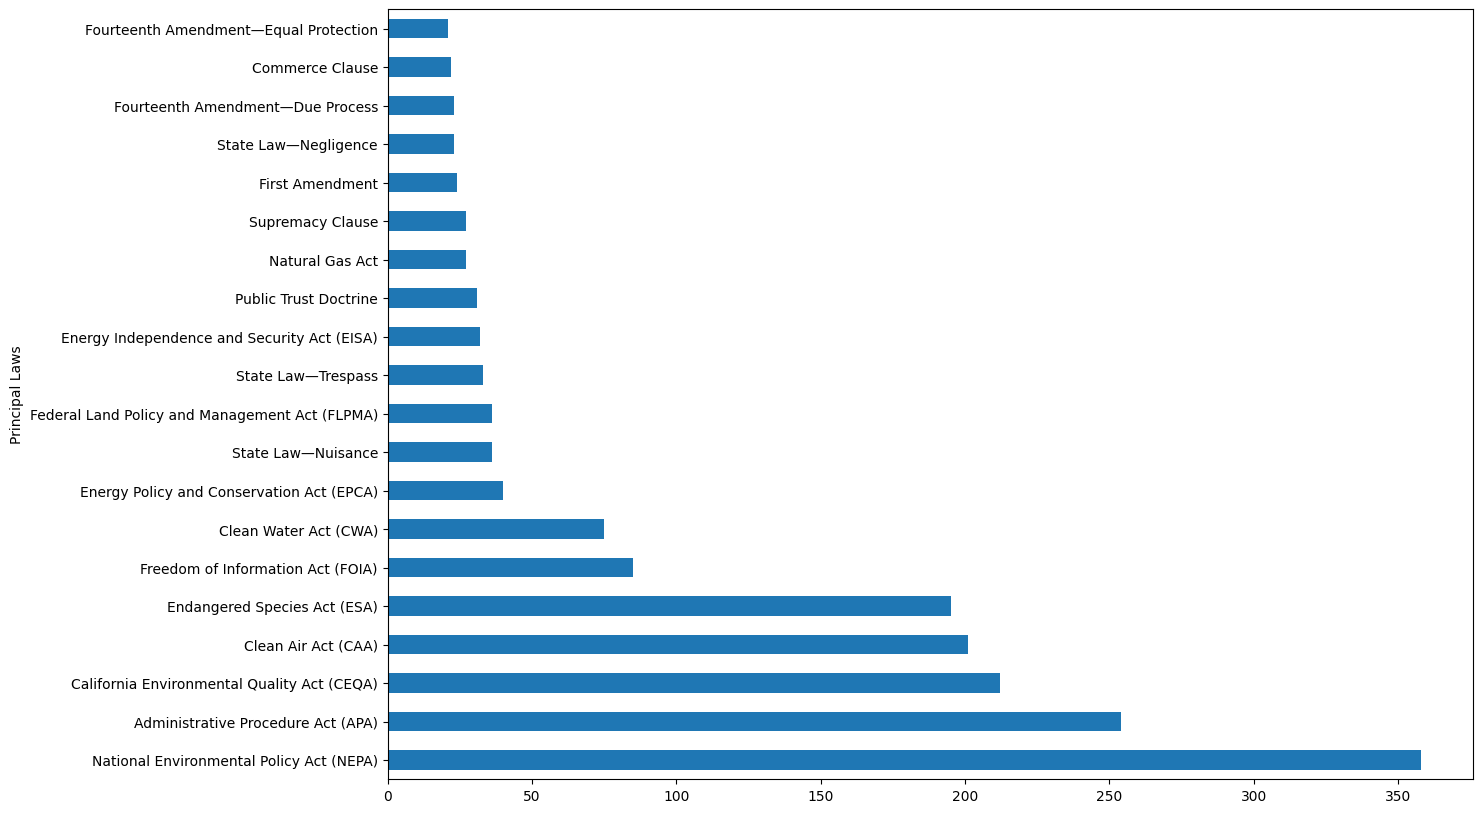

In [23]:

notna_field = us_cases_df["Principal Laws"].notna()
principal_laws = us_cases_df["Principal Laws"][notna_field].str.split(pat=r"|", regex=False).to_list()
principal_laws_df = pd.DataFrame(sum(principal_laws, []), columns=["Principal Laws"]).reset_index(drop=False)
principal_laws_df["Principal Laws"] = principal_laws_df["Principal Laws"].str.replace("|", "", regex=False).str.strip()
principal_laws_df.groupby("Principal Laws")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Filing Year,Case_Categories'>

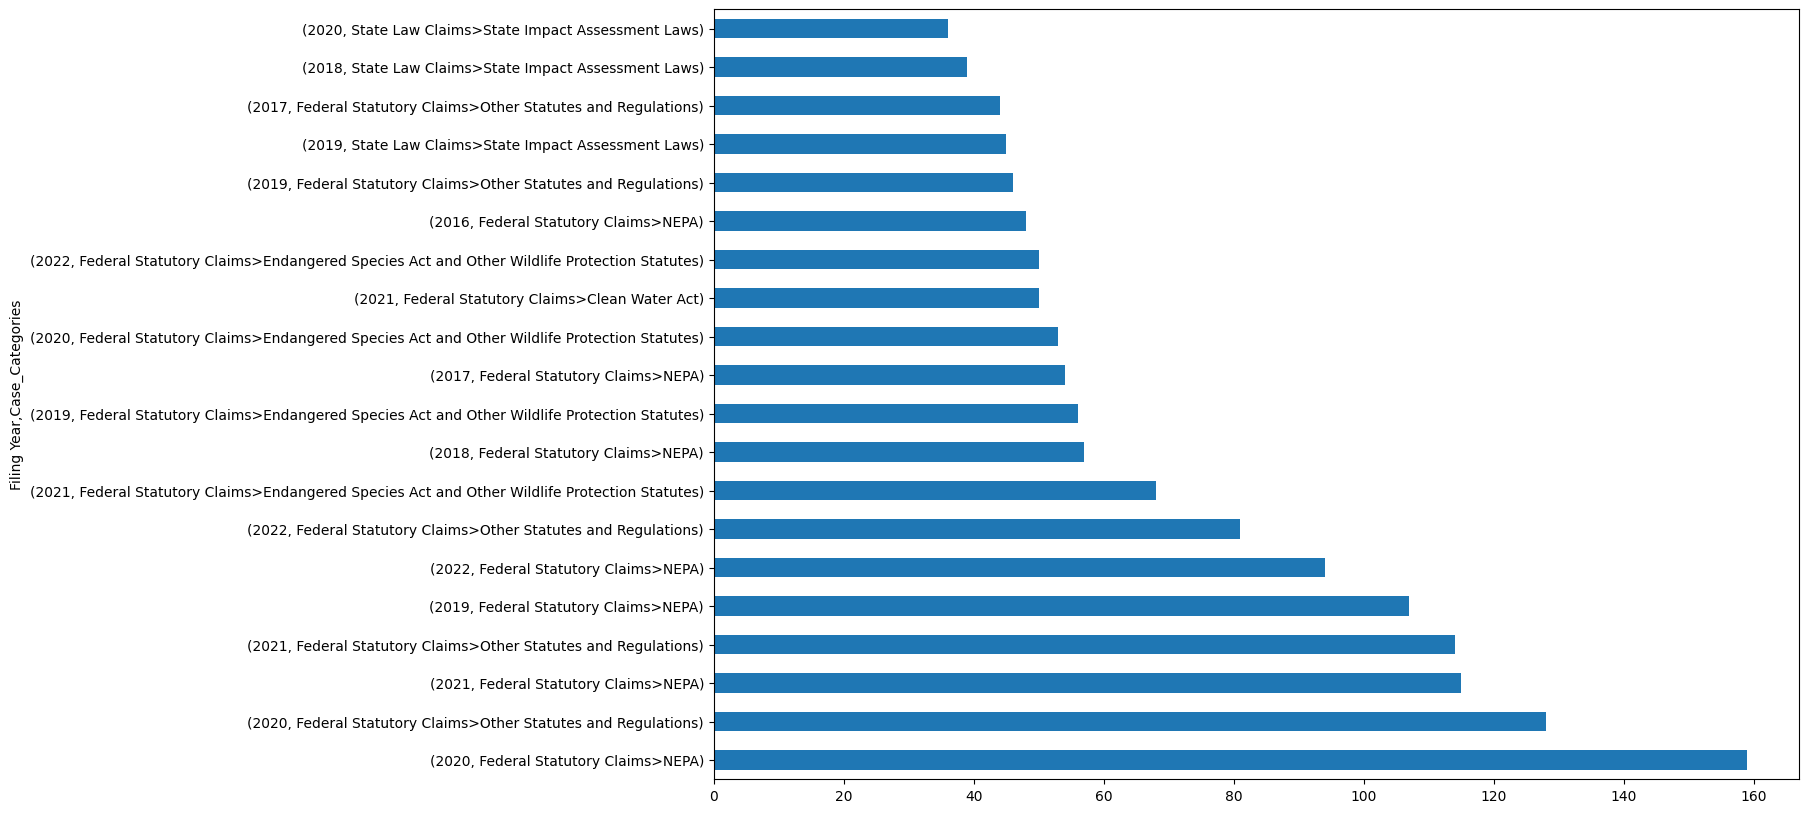

In [3]:
us_cases_explode_df = us_cases_df.rename(columns={"Case Categories":"Case_Categories", "Principal Laws":"Principal_Laws"})
us_cases_explode_df = us_cases_explode_df.assign(
        Case_Categories=us_cases_explode_df["Case_Categories"].str.split(pat=r"|", regex=False),
        Principal_Laws=us_cases_explode_df["Principal_Laws"].str.split(pat=r"|", regex=False),
    ).explode("Case_Categories").explode("Principal_Laws").reset_index(drop=True)


us_cases_explode_df.groupby(by=["Filing Year","Case_Categories"])["Case Name"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")


<Axes: ylabel='Filing Year,Principal_Laws'>

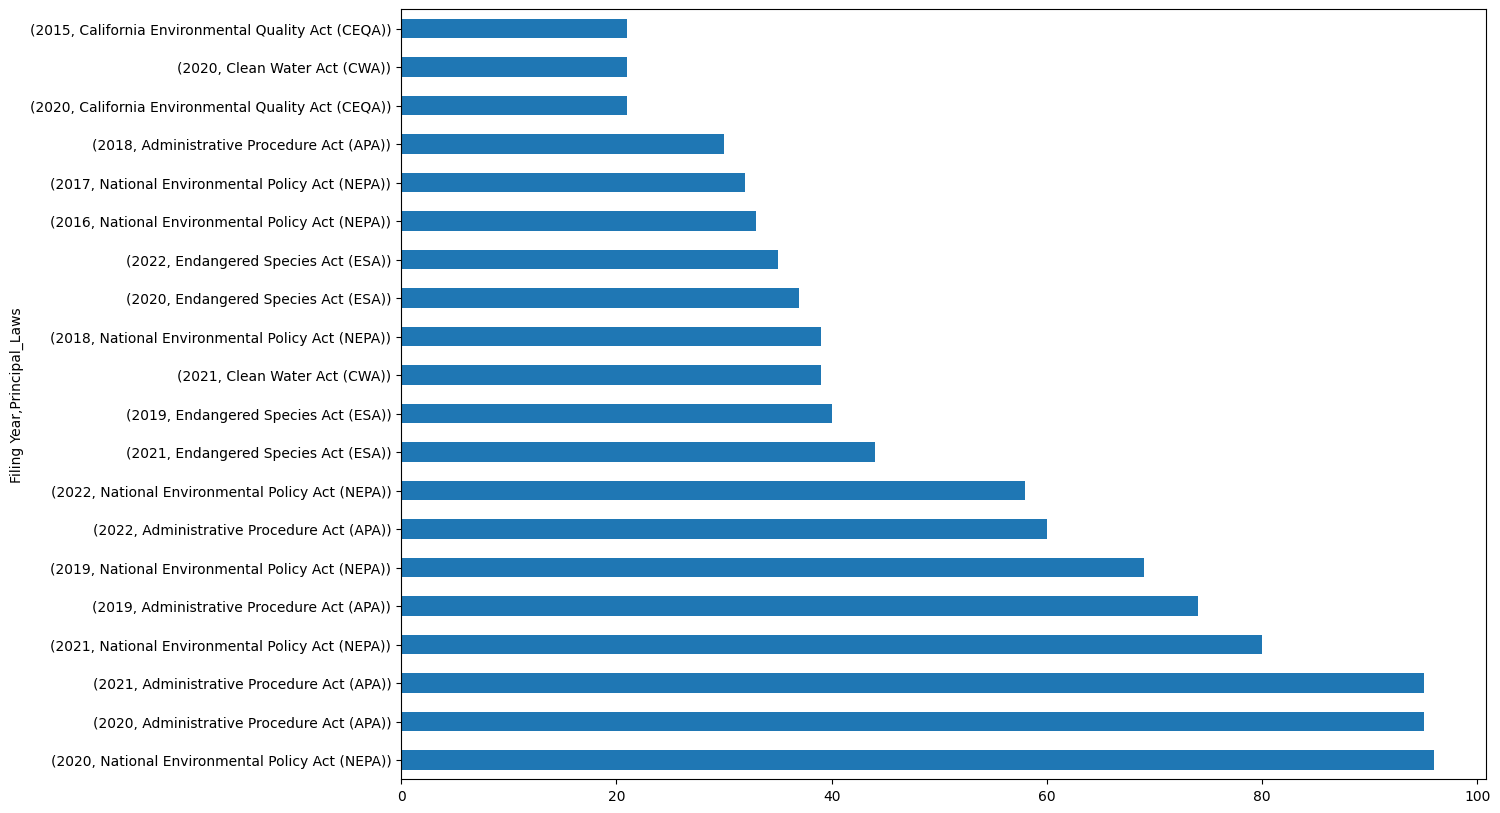

In [10]:
us_cases_explode_df.groupby(by=["Filing Year","Principal_Laws"])["Case Name"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

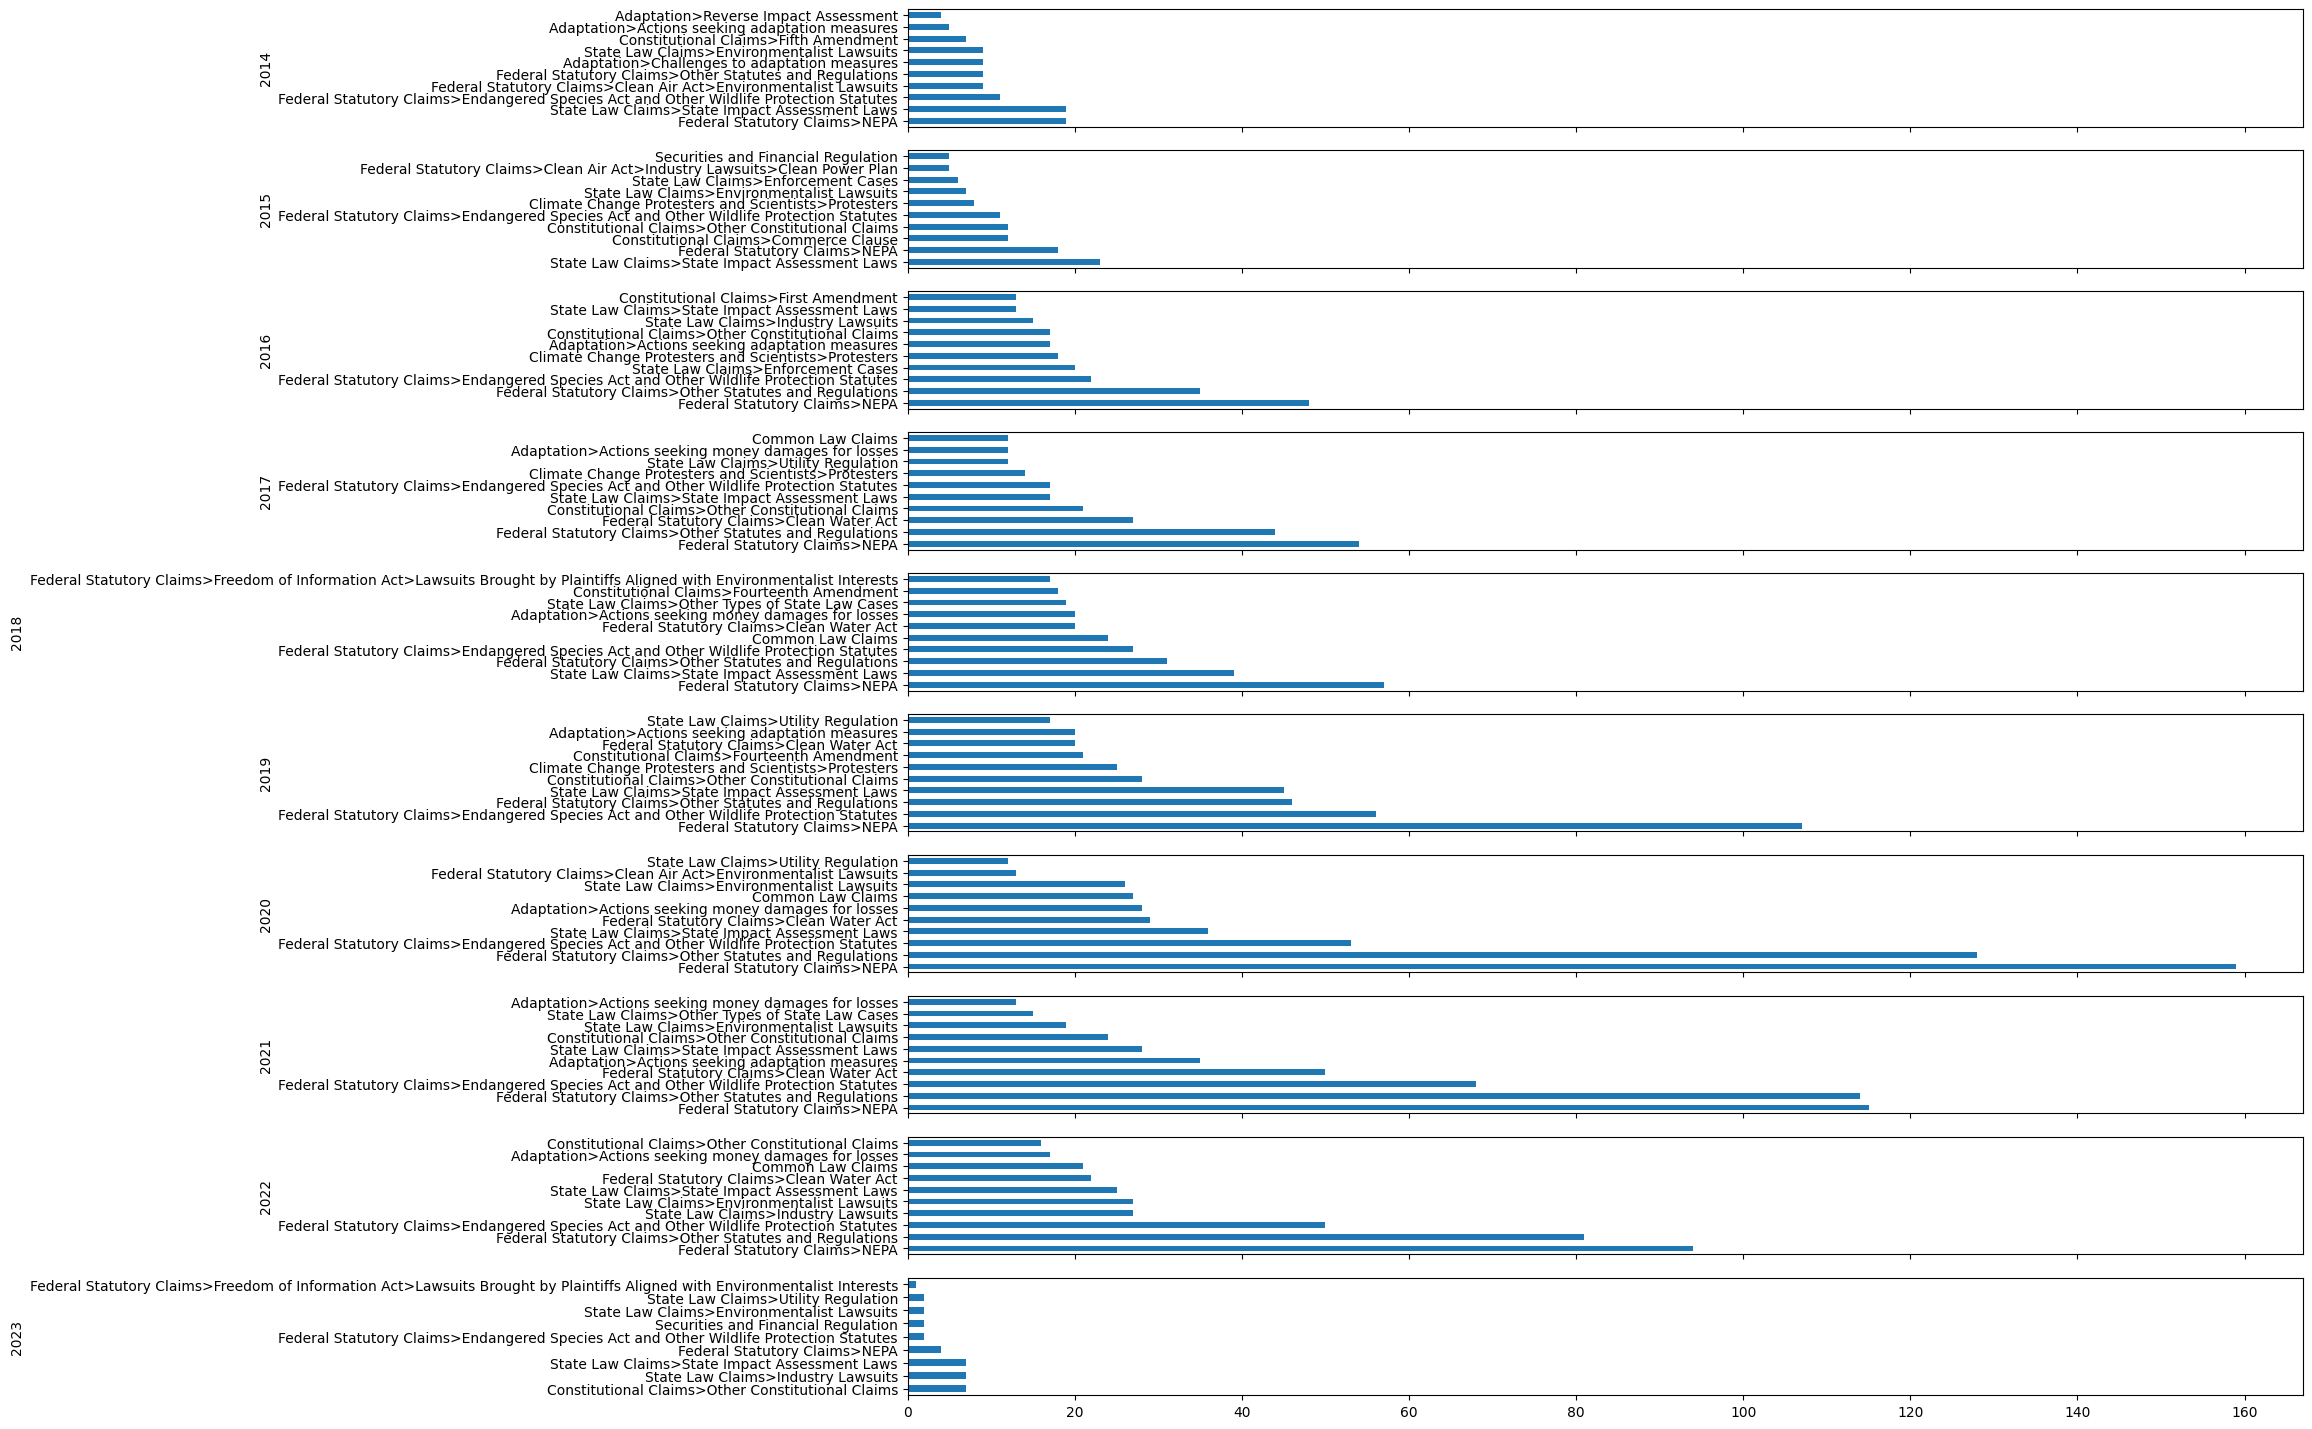

In [8]:

years = sorted(us_cases_explode_df["Filing Year"].unique())
selected_years = years[-10:]
fig, axes = plt.subplots(len(selected_years), 1, figsize=(18, 18), sharex=True)
for i, year in enumerate(selected_years):
    temp_df = us_cases_explode_df[us_cases_explode_df["Filing Year"] == year]
    temp_df.groupby(by=["Case_Categories"])["Case Name"].count().sort_values(ascending=False)[:10].plot(kind="barh", ax=axes[i], ylabel=year)
    


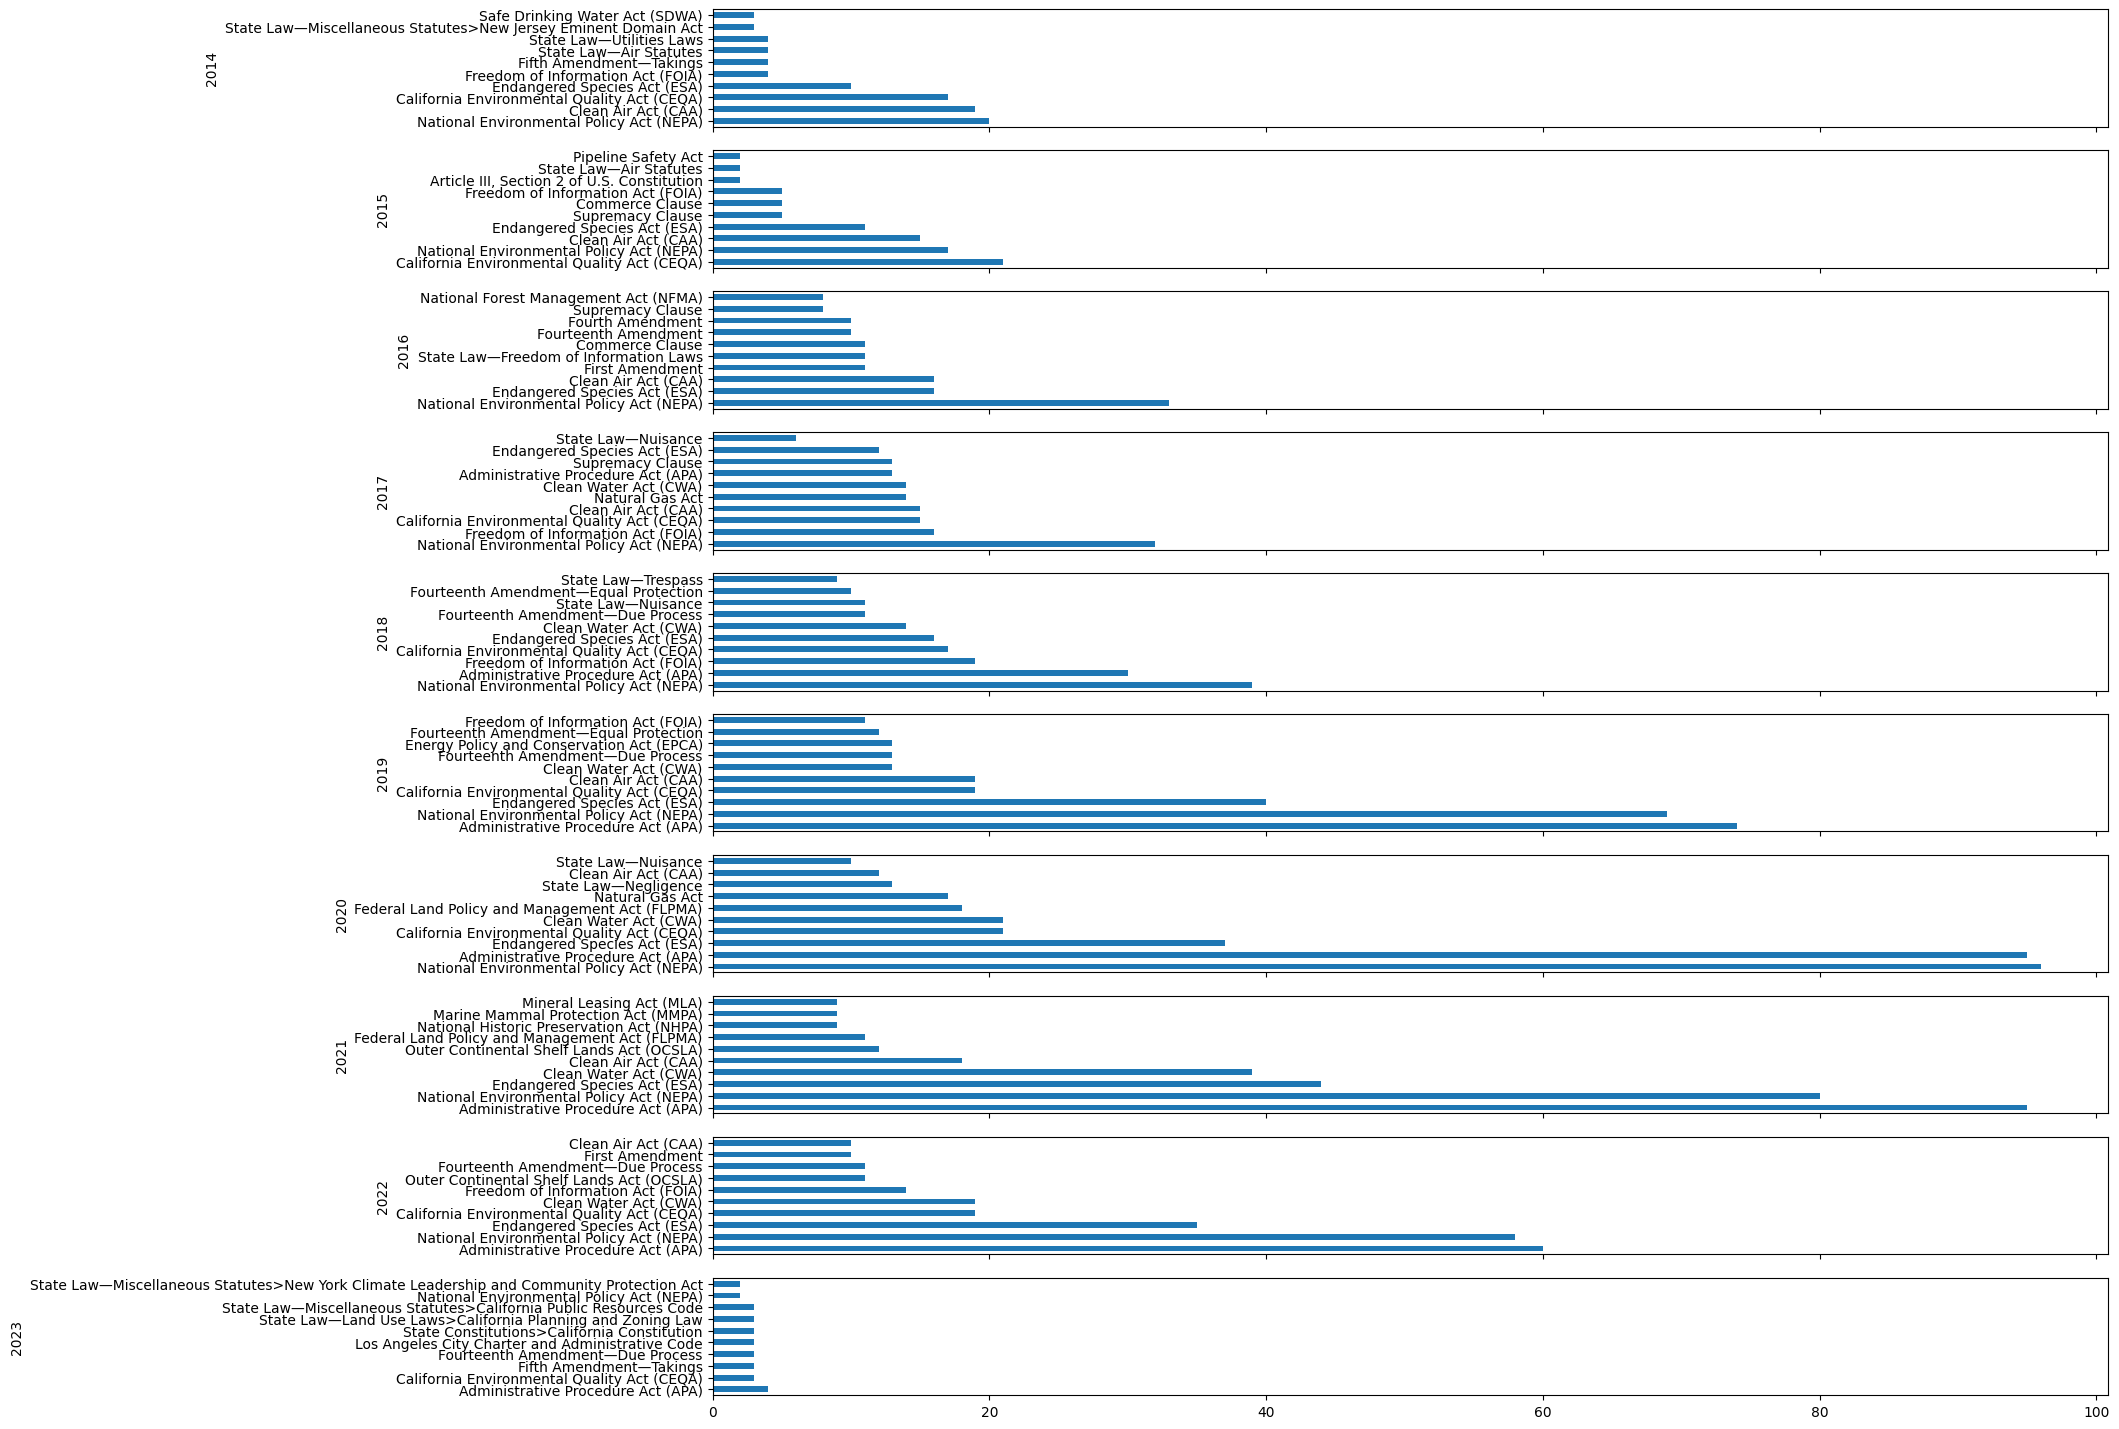

In [9]:

years = sorted(us_cases_explode_df["Filing Year"].unique())
selected_years = years[-10:]
fig, axes = plt.subplots(len(selected_years), 1, figsize=(18, 18), sharex=True)
for i, year in enumerate(selected_years):
    temp_df = us_cases_explode_df[us_cases_explode_df["Filing Year"] == year]
    temp_df.groupby(by=["Principal_Laws"])["Case Name"].count().sort_values(ascending=False)[:10].plot(kind="barh", ax=axes[i], ylabel=year)
    